# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from main import read_bills 
from extract_tags import entities_dataframe

In [3]:
tagged_bills = read_bills('./results')

In [4]:
entities = entities_dataframe(tagged_bills)

In [5]:
entities.describe()

,bill_path,orth,lex,ner,coarse_ner
count,2477,2477,2477,2477,2477
unique,105,639,482,29,8
top,1997_449.txt,Dz . U .,Dzieje_(Apostolskie) . u .,nam_org_institution,nam_org
freq,131,371,296,994,1267


# Frequency

## Fine-Grained

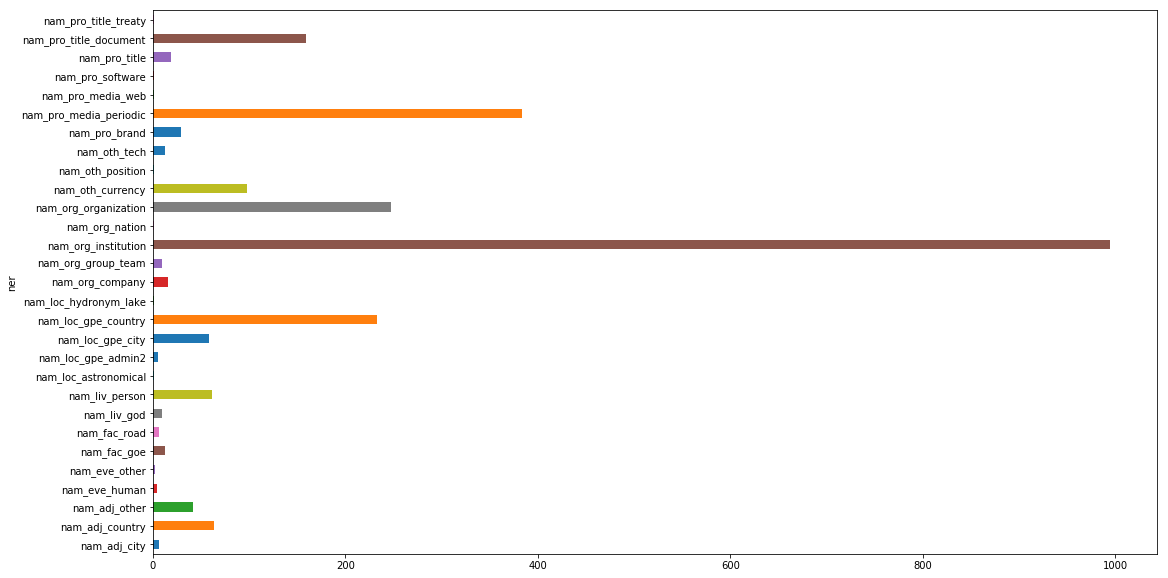

In [6]:
entities.groupby('ner').count()['orth'].plot.barh(figsize=(18, 10))
plt.show()

## Coarse-Grained

- nam_adj – przymiotniki pochodzące od nazw własnych,
- nam_eve – wydarzenia organizowane lub ustalone przez ludzi oraz klęski
żywiołowe,
- nam_fac – konstrukcje (budowle, budynki, pomniki) stworzone przez ludzi.
- nam_liv – istoty żywe (ludzie, postacie, zwierzęta),
- nam_loc – toponimy (lokalizacje, jednostki geopolityczne i geograficzne),
- nam_num – wyrażenia liczbowe,
- nam_org – organizacje, instytucje, zespoły, zorganizowane grupy itd.
- nam_oth – nazwy technologii, walut, adres e-mail, strony www, itd.
- nam_pro – chrematonimy (wytwory ludzkie).
---

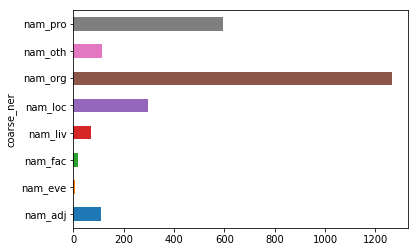

In [7]:
entities.groupby('coarse_ner').count()['orth'].plot.barh()
plt.show()

# Most Frequent Entities

## Top 50 Named Entities

In [8]:
tmp_df = entities.groupby('lex').count().sort_values(by='bill_path', ascending=False)
lex_freq = tmp_df.reset_index()[['lex', 'bill_path']][:50]
lex_freq.columns = ['lex', 'count']

In [9]:
for index, row in lex_freq.iterrows():
    lex = row['lex']
    count = row['count']
    ners = entities[entities['lex'] == lex]['ner'].unique()
    
    print('{}. "{}" - {}'.format(index, lex, count))
    
    for ner in ners:
        if ner is not None:
            print('\t{}'.format(ner))
    print('-------------------------------------')

0. "Dzieje_(Apostolskie) . u ." - 296
	nam_pro_media_periodic
-------------------------------------
1. "rzeczpospolita polski" - 134
	nam_loc_gpe_country
-------------------------------------
2. "złoty" - 88
	nam_oth_currency
-------------------------------------
3. "dziennik . u ." - 75
	nam_pro_media_periodic
-------------------------------------
4. "inspekcja celny" - 61
	nam_org_institution
-------------------------------------
5. "Polska" - 55
	nam_loc_gpe_country
-------------------------------------
6. "skarb państwo" - 54
	nam_org_institution
-------------------------------------
7. "polski" - 50
	nam_adj_country
-------------------------------------
8. "rada minister" - 45
	nam_org_institution
-------------------------------------
9. "europejski" - 45
	nam_adj_other
	nam_fac_road
	nam_adj_country
	nam_liv_person
-------------------------------------
10. "sejm" - 41
	nam_org_institution
	nam_fac_goe
-------------------------------------
11. "UDT" - 39
	nam_org_organization
----

## Top 10 Named Entities For Each Coarse-Grained Type

- nam_adj – przymiotniki pochodzące od nazw własnych,
- nam_eve – wydarzenia organizowane lub ustalone przez ludzi oraz klęski
żywiołowe,
- nam_fac – konstrukcje (budowle, budynki, pomniki) stworzone przez ludzi.
- nam_liv – istoty żywe (ludzie, postacie, zwierzęta),
- nam_loc – toponimy (lokalizacje, jednostki geopolityczne i geograficzne),
- nam_num – wyrażenia liczbowe,
- nam_org – organizacje, instytucje, zespoły, zorganizowane grupy itd.
- nam_oth – nazwy technologii, walut, adres e-mail, strony www, itd.
- nam_pro – chrematonimy (wytwory ludzkie).
---

In [10]:
for coarse_ner, cner_df in entities.groupby('coarse_ner'):
    print(coarse_ner)
    
    top = cner_df[cner_df['lex'].str.len() > 1] \
            .groupby('lex') \
            .count() \
            .sort_values(by='bill_path', ascending=False) \
            .reset_index()
    
    for _, t in top[:10].iterrows():
        print('\t{} - {}'.format(t['lex'], t['bill_path']))
    print('----------------')

nam_adj
	polski - 50
	europejski - 42
	wojewódzki - 10
	warszawski - 6
	niemiecki - 1
	olimpijski - 1
	unijny - 1
----------------
nam_eve
	II wojna światowy - 2
	kultura fizyczny i turystyka - 1
	parafia Dąbrówno - 1
	transportowy dozór techniczny - 1
	wspólny polityka rolny - 1
----------------
nam_fac
	biblioteka narodowy - 4
	europejski - 2
	straż graniczny - 2
	wojskowy dozór techniczny - 2
	augsburski - 1
	centralny ośrodek - 1
	ewangelicki - 1
	leśny las państwowy - 1
	sejm - 1
	spółka cukrowy - 1
----------------
nam_liv
	centralne ośrodek - 7
	rzecznik - 7
	główny inspektor - 6
	kart nauczyciel - 6
	Marszałek sejm - 4
	północny - 4
	kasa - 3
	kasa chora - 3
	najwyższy - 3
	gospodarka żywnościowy - 2
----------------
nam_loc
	rzeczpospolita polski - 134
	Polska - 55
	Warszawa - 21
	Rzeczpospolita Polska - 16
	warszawski - 5
	rad - 5
	rejestr - 4
	sztuk - 3
	rzeczpospolita Polska - 3
	republika Bułgaria - 3
----------------
nam_org
	inspekcja celny - 61
	skarb państwo - 54
	rada